## Webcam to Tensor and Back with Pytorch in Notebook

This is just a simple lab I did to se if I gould get my webcam, turn the input into a pytorch tensor and then back for somewhat realtime visualization, through a juputer notebook.<br>
If you suddenly have problems aquiring the webcam device, just try restarting the kernel.

In [1]:
%matplotlib inline

import cv2
import numpy as np # not acctually used, just good practice ;)
import matplotlib.pyplot as plt
from IPython import display
from PIL import Image
from torchvision import transforms

In [2]:
vc = cv2.VideoCapture(0)
vc

<VideoCapture 0000000009706FD0>

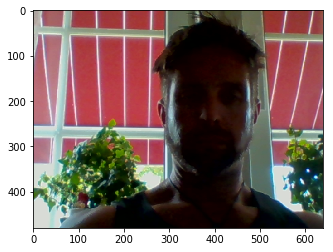

In [7]:
if vc.isOpened():
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame)    
else:
    is_capturing = False

In [8]:
# Here we create two transforms.
# In the first we demonstrate doing pre-transform on picture and then convert it to a tensor.
# The second is just a convenient way to get the tensor back into an image.
image_to_tensor = transforms.Compose([
    transforms.ColorJitter(brightness=0.5, hue=0.4),
    transforms.ToTensor()
    ])

tensor_to_image = transforms.Compose([
  transforms.ToPILImage()  
])

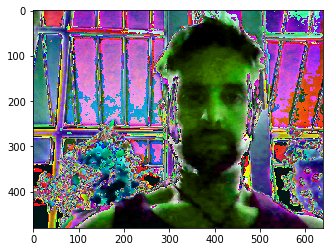

In [9]:
# Here we loop while getting frame from webcam, 
# do our stuff and listens for keyboard interrupts
while is_capturing:
    # run and except KeyboardInterrupts
    try:
        is_capturing, frame = vc.read()
        # convert color sys
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # preprocess and convert image to a tensor
        tensor = image_to_tensor( Image.fromarray(frame) )
        
        # Here we just make a division over the whole tensor to get
        # some extra LSD effect ;P
        tensor = tensor / 0.2
        
        # clear the previous display
        display.clear_output(wait=True)
        # convert back to image and display
        plt.imshow(tensor_to_image(tensor))  
        
        # some pause
        plt.pause(0.1)
    
    # release if we get an interrupt
    except KeyboardInterrupt:
        vc.release()